In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

=============================================================================================================

Trial 1

In [2]:
# !kaggle datasets download -d erdeq1024/bitcoin-price-analysis-by-tweets

In [3]:
!kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory

cryptocurrencypricehistory.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!kaggle datasets download -d gauravduttakiit/bitcoin-tweets-16m-tweets-with-sentiment-tagged

bitcoin-tweets-16m-tweets-with-sentiment-tagged.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile

zip_file_path = '/content/bitcoin-tweets-16m-tweets-with-sentiment-tagged.zip'
# zip_file_path = '/content/cryptocurrencypricehistory.zip'
extract_path = '/content'
# extract_path = '/content/cryp_price'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [6]:
data = pd.read_csv(r'/content/mbsa.csv')

In [7]:
# !zip -r tweet.zip /content/drive/MyDrive/DL_Project_Crypto
# from google.colab import files
# files.download('/content/tweet.zip')

===================================================================================================================

In [8]:
!pip install vaderSentiment

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
tweet = pd.read_csv(r'/content/drive/MyDrive/DL_Project_Crypto/Bitcoin_tweets.csv')

<ipython-input-11-1128a44916c1>:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  tweet = pd.read_csv(r'/content/drive/MyDrive/DL_Project_Crypto/Bitcoin_tweets.csv')


In [12]:
tweet.head(5)
tweet.shape

(2259788, 13)

In [13]:
price = pd.read_csv(r'/content/drive/MyDrive/DL_Project_Crypto/BTC-USD.csv')

In [14]:
price.head(5)
price.shape

(2691, 7)

In [15]:
tweet.columns
data_1 = tweet.iloc[:,[0,8,9,10,11,12]]

In [16]:
tweet = tweet.sort_values(by='date')

In [17]:
tweet.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
21523,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,2⃣ Debunking 9 #Bitcoin Myths by @Patrick_Lo...,"['Bitcoin', 'cryptocurrency', 'bitcoin', 'cryp...",Twitter Web App,False
21524,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about #cryp...,['crypto'],Twitter Web App,False
21522,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:06,4⃣ 🎙️ Bloomberg LP #CryptoOutlook 2021 with @...,"['CryptoOutlook', 'cryptocurrency', 'bitcoin',...",Twitter Web App,False
21521,Iconic Holding,"Frankfurt am Main, Germany",Professional Crypto Asset Ventures \nhttps://t...,2021-01-05 13:22:24,301.0,1075,361,False,2021-02-05 10:52:07,"5⃣ #Blockchain 50 2021 by @DelRayMan, @Forbe...","['Blockchain', 'cryptocurrency', 'bitcoin', 'c...",Twitter Web App,False
21520,Nick Doevendans,"Edam-Volendam, Nederland","Amateur historicus m.n. WW2, schrijver, muziek...",2020-06-12 16:50:07,37.0,123,410,False,2021-02-05 10:52:26,#reddcoin #rdd @reddcoin to the moon #altcoin ...,"['reddcoin', 'rdd', 'altcoin', 'turnreddcoinin...",Twitter for iPhone,False


In [18]:
# clean df
tweet = tweet.sort_values(by = 'date')
dd = tweet.sample(frac=0.01, replace=False, random_state=1)
dd.reset_index(inplace=True)
for i,s in enumerate(tqdm(dd['text'],position=0, leave=True)):
    text = str(dd.loc[i, 'text'])
    text = text.replace("#", "")
    text = re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', '', text, flags=re.MULTILINE)
    text = re.sub('@\\w+ *', '', text, flags=re.MULTILINE)
    dd.loc[i, 'text'] = text
# f = open(tweets_clean_file, 'a+', encoding='utf-8')
dd.to_csv('tweets_cleaned.csv', header=True, encoding='utf-8',index=False)

100%|██████████| 22598/22598 [00:21<00:00, 1075.00it/s]


In [19]:
c_tweet = pd.read_csv(r'/content/tweets_cleaned.csv')

In [20]:
c_tweet.columns

Index(['index', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [21]:
c_tweet = c_tweet.iloc[:,[0,5,6,7,9,10,11,13]]

In [22]:
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(c_tweet['text'],position=0, leave=True)):
    # print(i,s)
    vs = analyzer.polarity_scores(str(s))
    compound.append(vs["compound"])
c_tweet["compound"] = compound
c_tweet.head(5)

100%|██████████| 22598/22598 [00:06<00:00, 3649.88it/s]


,index,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet,compound
0,195760,616.0,1683.0,1712.0,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",False,0.5994
1,1135874,451.0,2045.0,45077.0,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],False,0.0000
2,332828,468.0,111.0,1262.0,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",False,0.2023
3,581946,35990.0,4447.0,682.0,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],False,0.0000
4,108170,164.0,100.0,9295.0,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",False,0.0000


### Score

In [23]:
scores = []
for i, s in tqdm(c_tweet.iterrows(), total=c_tweet.shape[0],position=0, leave=True):
    try:
        scores.append(s["compound"] * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
c_tweet["score"] = scores
c_tweet.head(5)

100%|██████████| 22598/22598 [00:01<00:00, 12886.33it/s]


,index,user_followers,user_friends,user_favourites,date,text,hashtags,is_retweet,compound,score
0,195760,616.0,1683.0,1712.0,2021-06-22 05:22:52,nice project \n\n\n\n\n\nortcoin ort okratech ...,"['ortcoin', 'ort', 'okratech', 'bitcoin', 'air...",False,0.5994,1025.108064
1,1135874,451.0,2045.0,45077.0,2021-08-25 07:06:40,Long Bitcoin short the banks 🧐,['Bitcoin'],False,0.0000,0.000000
2,332828,468.0,111.0,1262.0,2021-07-02 19:37:18,Top Trending Cryptocurrency Post - DOGECOIN Se...,"['Cryptocurrency', 'Bitcoin']",False,0.2023,254.960113
3,581946,35990.0,4447.0,682.0,2021-07-24 14:14:53,Can one expect another wave of BTC's decline s...,['BTC'],False,0.0000,0.000000
4,108170,164.0,100.0,9295.0,2021-05-29 15:52:17,We will see…\n\nbitcoin btc bnb band bake $btc...,"['bitcoin', 'btc', 'bnb', 'band', 'bake']",False,0.0000,0.000000


### Bitcoin price

In [24]:
df_price = pd.read_csv(r'/content/drive/MyDrive/DL_Project_Crypto/BTC-USD.csv')
df_price.Date = pd.to_datetime(df_price.Date)
df_price.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### sentiment-Analysis

In [25]:
c_tweet = c_tweet.drop_duplicates()
tweets = c_tweet.copy()
tweets['date'] = pd.to_datetime(tweets['date'],utc=True)
tweets.date = tweets.date.dt.tz_localize(None)
tweets.index = tweets['date']

tweets_grouped = tweets.resample('1h').sum()

crypto_usd = df_price.copy()
crypto_usd['Date'] = pd.to_datetime(crypto_usd['Date'], unit='s')
crypto_usd.index = crypto_usd['Date']


crypto_usd_grouped = crypto_usd.resample('D')['Close'].mean()

<ipython-input-25-c812df871378>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tweets_grouped = tweets.resample('1h').sum()


In [26]:
def crosscorr(datax, datay):
    return datax.corrwith(datay.shift(0), method='pearson')['score']

In [27]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

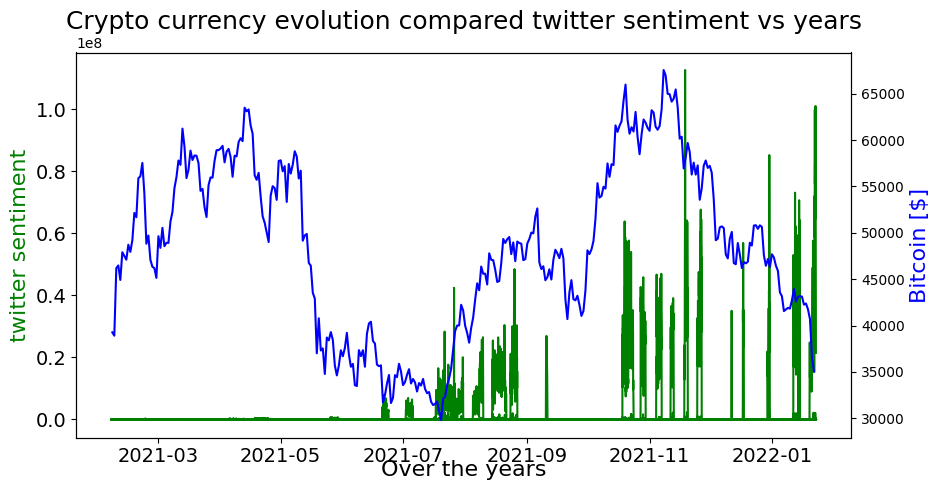

In [28]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title("Crypto currency evolution compared twitter sentiment vs years", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("twitter sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)

ax1.text(0.5, -0.1, "Over the years", transform=ax1.transAxes, fontsize=16, ha='center')
plt.show()

### Normalize

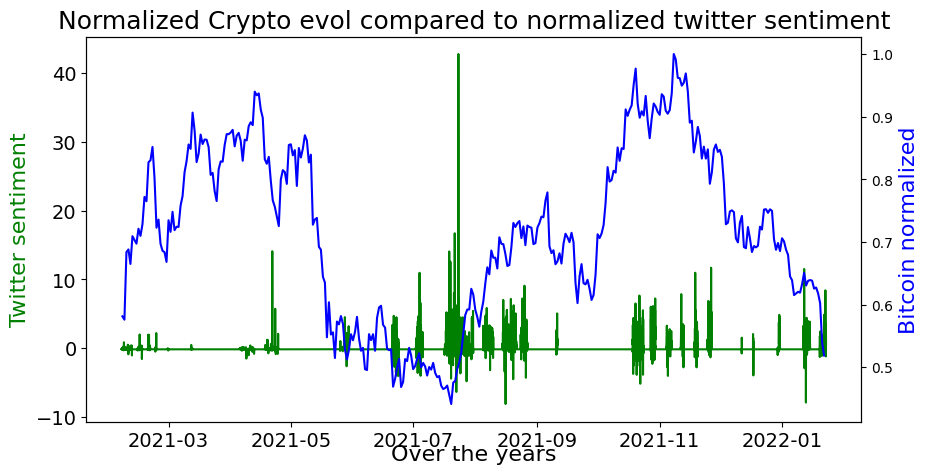

In [29]:
# Normalize time series data
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1,1))
tweets_grouped['normalized_score'] = score_scaled
# crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped.values.reshape(-1,1))
crypto_used_grouped_scaled = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))
# crypto_usd_grouped['normalized_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title("Normalized Crypto evol compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalized_score'], 'g-')
ax2.plot_date(crypto_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Twitter sentiment", color='g', fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)

ax1.text(0.5, -0.1, "Over the years", transform=ax1.transAxes, fontsize=16, ha='center')
plt.show()

### Derivative of crypto price

In [30]:
tweets_grouped_derivative = pd.Series(np.gradient(tweets_grouped['normalized_score'].values), tweets_grouped.index, name='slope')
crypto_usd_grouped_derivative = pd.Series(np.gradient(crypto_usd_grouped.values), crypto_usd_grouped.index, name='slope')

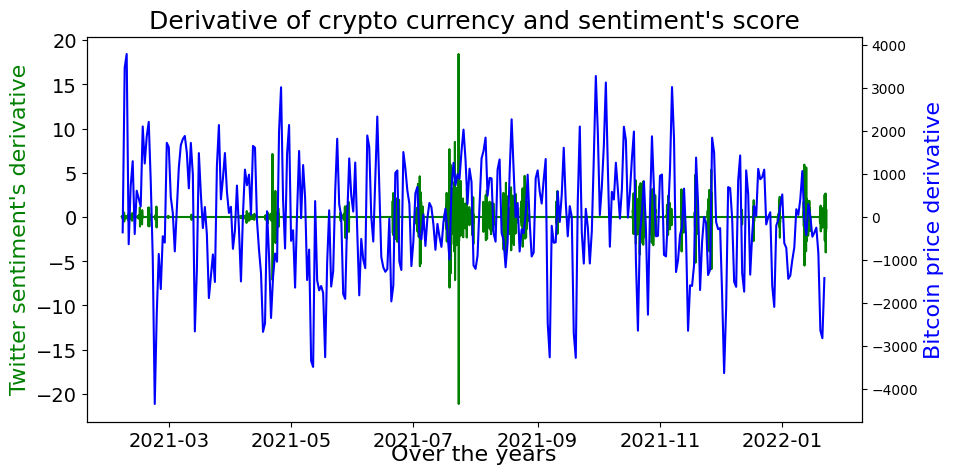

In [31]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_title("Derivative of crypto currency and sentiment's score", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped_derivative.index, tweets_grouped_derivative, 'g-')
ax2.plot_date(crypto_usd_grouped_derivative.index, crypto_usd_grouped_derivative, 'b-')

ax1.set_ylabel("Twitter sentiment's derivative", color='g', fontsize=16)
ax2.set_ylabel('Bitcoin price derivative', color='b', fontsize=16)

ax1.text(0.5, -0.1, "Over the years", transform=ax1.transAxes, fontsize=16, ha='center')
plt.show()

### NLP

In [32]:
! pip install textblob
from textblob import TextBlob

df = c_tweet.copy()
df.dropna(subset=['hashtags'], inplace=True)
df = df[['text']]
df.columns = ['tweets']
df.head()

,tweets
0,nice project \n\n\n\n\n\nortcoin ort okratech ...
1,Long Bitcoin short the banks 🧐
2,Top Trending Cryptocurrency Post - DOGECOIN Se...
3,Can one expect another wave of BTC's decline s...
4,We will see…\n\nbitcoin btc bnb band bake $btc...


In [33]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words(['english'])

print(stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Package punkt is already up-to-date!


In [34]:
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

def cleaning(data):
    #remove urls
    tweet_without_url = re.sub(r'http\S+',' ', data)

    #remove hashtags
    tweet_without_hashtag = re.sub(r'#\w+', ' ', tweet_without_url)

    #3. Remove mentions and characters that not in the English alphabets
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    #2. Tokenize
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)

    #3. Remove Puncs
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]

    #6. Joining
    return " ".join(text_cleaned)

In [35]:
df['cleaned_tweets'] = df['tweets'].apply(cleaning)
df['date'] = c_tweet['date']
df['date_clean'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')
df.drop(columns='date',inplace=True)
df.head()

,tweets,cleaned_tweets,date_clean
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29


In [36]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [37]:
def crypto_price_cate(score):
    if score < 1:
        return 'negative'
    elif score == 1:
        return 'neutral'
    else:
        return 'positive'
def observe_period(period):
    res = crypto_usd_grouped.shift(period)/crypto_usd_grouped
    res = res.apply(crypto_price_cate)
    return res

time_sentiment = observe_period(7) # compare price ratio in 7 days. price_7_days_later/ price_now
df['crypto_sentiment'] = df.date_clean.apply(lambda x: time_sentiment[x] if x in time_sentiment else np.nan)

In [38]:
df['subjectivity'] = df['cleaned_tweets'].apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].apply(getPolarity)
df.head()

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,positive,0.00,0.000


In [39]:
def getSentiment(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
df['sentiment'] = df['polarity'].apply(getSentiment)
df['target'] = df['sentiment'] == df['crypto_sentiment']
df.head()
df.to_csv('./df_data.csv')

### ============================================================================================

## Model

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Bidirectional, SpatialDropout1D
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
df.head(5)

,tweets,cleaned_tweets,date_clean,crypto_sentiment,subjectivity,polarity,sentiment,target
0,nice project \n\n\n\n\n\nortcoin ort okratech ...,nice project ortcoin ort okratech bitcoin aird...,2021-06-22,positive,1.00,0.600,positive,True
1,Long Bitcoin short the banks 🧐,Long Bitcoin short bank,2021-08-25,negative,0.35,-0.025,negative,True
2,Top Trending Cryptocurrency Post - DOGECOIN Se...,Top Trending Cryptocurrency Post DOGECOIN Sell...,2021-07-02,negative,0.40,0.250,positive,False
3,Can one expect another wave of BTC's decline s...,Can one expect another wave BTC decline soon v...,2021-07-24,negative,0.00,0.000,neutral,False
4,We will see…\n\nbitcoin btc bnb band bake $btc...,We see bitcoin btc bnb band bake btc dCc xZ dP,2021-05-29,positive,0.00,0.000,neutral,False


In [42]:
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

In [56]:
np.random.seed(38) # some random number

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=38)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17936,) (4484,) (17936, 3) (4484, 3)


In [57]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [58]:
from tensorflow.keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(17936, 30) (4484, 30)


In [46]:
# import tensorflow.keras.backend as K
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
# from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# X = df['cleaned_tweets']
# y = pd.get_dummies(df['sentiment']).values
# num_classes = df['sentiment'].nunique()

# np.random.seed(38) # some random number

# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2,
#                                                     stratify=y,
#                                                     random_state=38)
# # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# max_features = 20000
# tokenizer = Tokenizer(num_words=max_features)
# tokenizer.fit_on_texts(list(X_train))
# X_train = tokenizer.texts_to_sequences(X_train)
# X_test = tokenizer.texts_to_sequences(X_test)

# from tensorflow.keras.preprocessing import sequence
# max_words = 30
# X_train = sequence.pad_sequences(X_train, maxlen=max_words)
# X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# print(X_train.shape,X_test.shape)


# batch_size = 128
# epochs = 10

# max_features = 20000
# embed_dim = 100
# seed = 38
# np.random.seed(seed)
# K.clear_session()
# model = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
#                           epochs=epochs, batch_size=batch_size, verbose=2)

# def plot_training_hist(history):
#     '''Plotting history for accuracy and loss'''

#     fig, ax = plt.subplots(1,2, figsize=(10,4))
#     # first plot
#     ax[0].plot(history.history['accuracy'])
#     ax[0].plot(history.history['val_accuracy'])
#     ax[0].set_title('Model Accuracy')
#     ax[0].set_xlabel('epoch')
#     ax[0].set_ylabel('accuracy')
#     ax[0].legend(['train', 'validation'], loc='best')

#     # second plot
#     ax[1].plot(history.history['loss'])
#     ax[1].plot(history.history['val_loss'])
#     ax[1].set_title('Model Loss')
#     ax[1].set_xlabel('epoch')
#     ax[1].set_ylabel('loss')
#     ax[1].legend(['train', 'validation'], loc='best')

# plot_training_hist(history)

# y_pred_test =  np.argmax(model.predict(X_test), axis=1)
# print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
# print(classification_report(np.argmax(y_test,axis=1), y_pred_test))


In [47]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 10

max_features = 20000
embed_dim = 100
seed = 38
np.random.seed(seed)
K.clear_session()
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 100)           2000000   
                                                                 
 conv1d (Conv1D)             (None, 30, 32)            9632      
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 32)            3104      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 100)               5

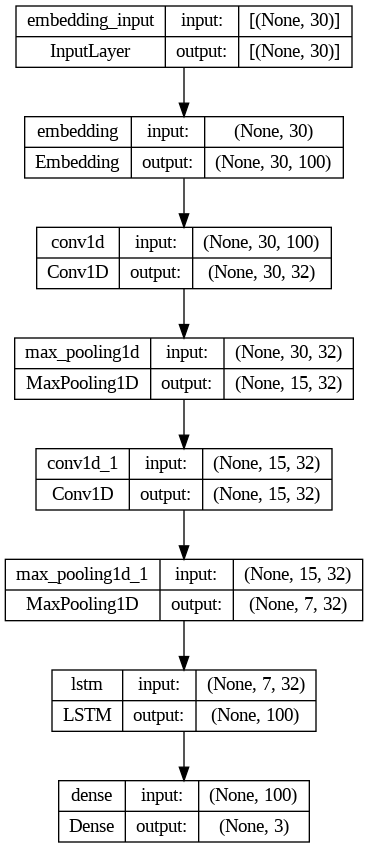

In [48]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/10
141/141 - 70s - loss: 0.6482 - accuracy: 0.7282 - val_loss: 0.4017 - val_accuracy: 0.8544 - 70s/epoch - 496ms/step
Epoch 2/10
141/141 - 20s - loss: 0.2860 - accuracy: 0.9018 - val_loss: 0.3091 - val_accuracy: 0.8959 - 20s/epoch - 140ms/step
Epoch 3/10
141/141 - 20s - loss: 0.1238 - accuracy: 0.9605 - val_loss: 0.2832 - val_accuracy: 0.9135 - 20s/epoch - 142ms/step
Epoch 4/10
141/141 - 12s - loss: 0.0443 - accuracy: 0.9880 - val_loss: 0.3110 - val_accuracy: 0.9246 - 12s/epoch - 88ms/step
Epoch 5/10
141/141 - 19s - loss: 0.0227 - accuracy: 0.9943 - val_loss: 0.3177 - val_accuracy: 0.9284 - 19s/epoch - 132ms/step
Epoch 6/10
141/141 - 25s - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.3393 - val_accuracy: 0.9222 - 25s/epoch - 175ms/step
Epoch 7/10
141/141 - 7s - loss: 0.0123 - accuracy: 0.9974 - val_loss: 0.3832 - val_accuracy: 0.9251 - 7s/epoch - 49ms/step
Epoch 8/10
141/141 - 8s - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.3829 - val_accuracy: 0.9248 - 8s/epoch - 54ms/step

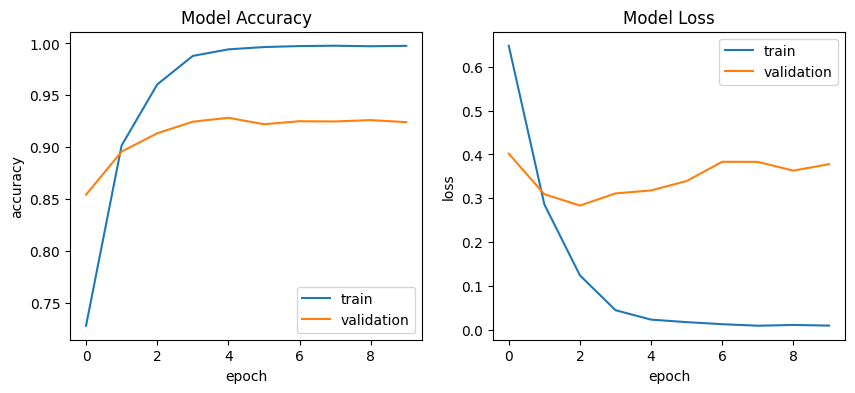

In [50]:
def plot_training_hist(history):
    '''Plotting history for accuracy and loss'''

    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')

    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

In [51]:
y_pred_test =  np.argmax(model.predict(X_test), axis=1)
print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

141/141 [==============================] - 1s 4ms/step
Accuracy:	92.4%
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       477
           1       0.95      0.95      0.95      1779
           2       0.95      0.93      0.94      2228

    accuracy                           0.92      4484
   macro avg       0.88      0.89      0.88      4484
weighted avg       0.93      0.92      0.92      4484



### CapsNet

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your dataset (df) here
X = df['cleaned_tweets']
y = pd.get_dummies(df['sentiment']).values
num_classes = df['sentiment'].nunique()

np.random.seed(38)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=38)

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Padding sequences to the length of 30
max_words = 30
X_train = pad_sequences(X_train, maxlen=max_words)
X_test = pad_sequences(X_test, maxlen=max_words)

batch_size = 128
epochs = 10

embed_dim = 100

# Clear previous models
tf.keras.backend.clear_session()

# Define the Capsule Layer
class CapsuleLayer(keras.layers.Layer):
    def __init__(self, num_capsules, capsule_dim, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.capsule_dim = capsule_dim
        self.routings = routings

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(
            name='W',
            shape=(1, input_dim, self.num_capsules * self.capsule_dim),  # Update shape
            initializer='glorot_uniform',
            trainable=True,
        )
        super(CapsuleLayer, self).build(input_shape)

    def call(self, inputs):
        input_expand = tf.expand_dims(inputs, -1)
        input_tiled = tf.tile(input_expand, [1, 1, self.num_capsules, 1])

        # Perform matrix multiplication using tf.matmul
        input_hat = tf.matmul(input_tiled, self.W)
        input_hat = tf.reshape(input_hat, (-1, input_hat.shape[1], self.num_capsules, self.capsule_dim))

        b = tf.zeros(shape=[tf.shape(input_hat)[0], input_hat.shape[1], self.num_capsules], dtype=tf.float32)
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            outputs = self.squash(tf.reduce_sum(c[:, :, :, tf.newaxis] * input_hat, axis=1, keepdims=True))
            if i < self.routings - 1:
                b += tf.reduce_sum(input_hat * outputs, axis=-1)

        return tf.squeeze(outputs, axis=1)

In [ ]:
# Build the model using the Capsule Layer
model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=max_features, output_dim=embed_dim, input_length=max_words))
model.add(CapsuleLayer(num_capsules=10, capsule_dim=16, routings=3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)

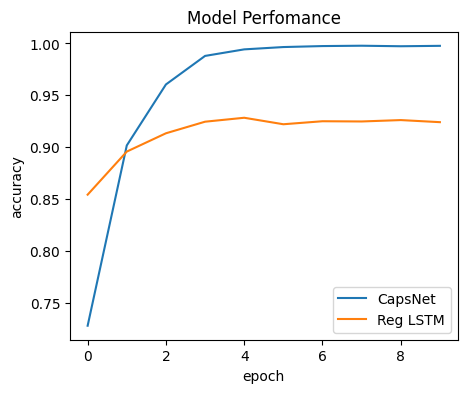

In [82]:
# Plot training history
def plot_perf(history):
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(history.history['accuracy'])
    ax.plot(history.history['val_accuracy'])
    ax.set_title('Model Perfomance')
    ax.set_xlabel('epoch')
    ax.set_ylabel('accuracy')
    ax.legend(['CapsNet', 'Reg LSTM'], loc='best')

plot_perf(history)

In [84]:
# Evaluate the model
y_pred_test = np.argmax(model.predict(X_test), axis=1)
print('Accuracy: {:0.1f}%'.format(accuracy_score(np.argmax(y_test, axis=1), y_pred_test) * 100))
print(classification_report(np.argmax(y_test, axis=1), y_pred_test))

141/141 [==============================] - 1s 4ms/step
Accuracy:	96.4%
              precision    recall  f1-score   support
   
           0       0.76      0.79      0.80       480
           1       0.95      0.95      0.95      1779
           2       0.98      0.95      0.96      2240
   
    accuracy                           0.92      4492
   macro avg       0.89      0.90      0.89      4492
weighted avg       0.97      0.96      0.96      4492
